<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

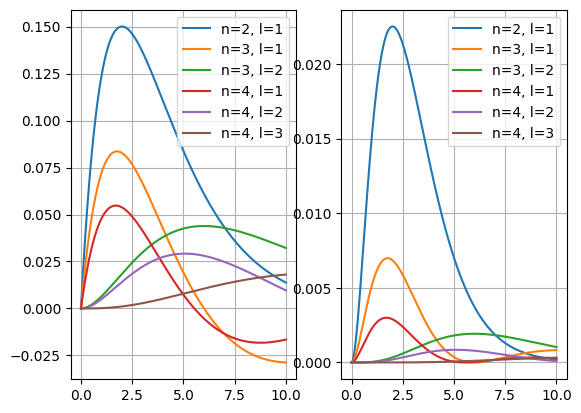

In [31]:
import numpy as np
import sympy as sp
import functions as fn
from IPython.display import display, Math
import scipy.integrate as int
import matplotlib.pyplot as plt

hbar = 1
me   = 1
mp = 1836.15
u = (me*mp)/(me+mp)
Z = 1

w, r, phi, theta , phi_p,theta_p = sp.symbols('w r phi theta phi_p theta_p', real=True)
f1 = sp.Function('R_{nl}')(phi,theta)
f2 = sp.Function('R_{nl}')(phi_p,theta_p)
hb = sp.symbols('hbar')
N,L,M = sp.symbols('n l m', integer=True)

"""
Como principalmente para este taller se conocerán las transiciones energeticas y las series medidas, se necesitan las conversiones de unidades atomicas a unidades energeticas, y tambien unidades de longitud de onda.
"""

hart2cm = 455.633 # en angstroms
hart2ev = 27.2116 # en electronvoltios


# Ahora definamos las funciones radiales y su densidad, es decir, el módulo de estas funciones al cuadrado. Lo haremos de forma similas a como hicimos con los armonicos esfericos

def eferic_armonics_symbol(var1,var2,l,m):
    ef = (sp.sqrt((2*l+1)/(4*sp.pi) * sp.factorial(l-abs(m))/sp.factorial(l+abs(m)) )
          * sp.exp(sp.I * m * var2) * 1/(2**l * sp.factorial(l)) *
          (1-w**2)**(abs(m)/2)* sp.Derivative((w**2-1)**l,(w,l+abs(m))))
    ef = ef.subs(w,sp.cos(var1))
    return ef

def eferic_armonics_numeric(var1,var2,l,m):
    ef = (sp.sqrt((2*l+1)/(4*sp.pi) * sp.factorial(l-abs(m))/sp.factorial(l+abs(m)) )
          * sp.exp(sp.I * m * var2) * 1/(2**l * sp.factorial(l)) *
          (1-w**2)**(abs(m)/2)* sp.diff((w**2-1)**l,(w,l+abs(m))))
    ef = ef.subs(w,sp.cos(var1))
    return ef

def Radial_part_numeric(var1,n,l):
    p = 2*Z*u/n  * var1
    radial = sp.S(0)
    for k in range(n-l):
        radial +=  (-1)**(k+1) * (sp.factorial(n+l))**2/ (sp.factorial(n-l-1-k)*sp.factorial(2*l+1+k)*sp.factorial(k)) * p**k

    radial *= - sp.sqrt(((2*Z*u/n)**3 * sp.factorial(n-l-1)/(2*n*(sp.factorial(n+l))**3  ))) * sp.exp(-p/2) * p**l

    return radial

def integrate_2d(Z, x, y, method):
    """
    Z: 2D array shaped (len(y), len(x))  -> f(y_i, x_j)
    x: 1D array (len Nx)
    y: 1D array (len Ny)
    method: 'rect', 'trapz', or 'simps'
    """
    if method == 'rect':
        dx = x[1]-x[0]
        dy = y[1]-y[0]
        return np.sum(Z) * dx * dy
    elif method == 'trapz':
        return np.trapezoid(np.trapezoid(Z, x=x, axis=1), x=y, axis=0)
    elif method == 'simps':
        return int.simpson(int.simpson(Z, x=x, axis=1), x=y, axis=0)
    else:
        raise ValueError("method must be 'rect','trapz' or 'simps'")


def safe_lambdify(vars, expr):
    f = sp.lambdify(vars, expr, "numpy")
    return lambda *args: np.broadcast_to(f(*args), np.broadcast(*args).shape)


rvals,thetvals,phivals = np.linspace(0,10,500),np.linspace(0,np.pi,500) , np.linspace(0,2*np.pi,500)
Tvals, Pvals = np.meshgrid(thetvals, phivals) # x, y

fig1 ,(ax1,ax2) = plt.subplots(1,2)



for n in range(5):
    for l in range(1,n):
        rad_num =safe_lambdify(r, Radial_part_numeric(r,n,l))
        rad_num = rad_num(rvals)

        display (Math(f"R_{{{n}{l}}}(r) =" + sp.latex(Radial_part_numeric(r,n,l)  )))
        ax1.plot(rvals, rad_num,label=f"n={n}, l={l}")
        ax2.plot(rvals, rad_num**2,label=f"n={n}, l={l}")

ax1.grid()
ax1.legend()
ax2.grid()
ax2.legend()

In [45]:
# Estudiemos la ortormalidad de estas funciones

num = 4

for np in range(num):
    for lp in range(np):
        # rad_num1 = safe_lambdify(r, Radial_part_numeric(r,np,lp))
        # rad_num1 = rad_num1(rvals)
        for n in range(num):
            for l in range(n):
                # rad_num2 = safe_lambdify(r, Radial_part_numeric(r,n,l))
                # rad_num2 = rad_num2(rvals)

                display (Math(f"<R_{{{np}{lp}}}|R_{{{n}{l}}}> =" + sp.latex(round(sp.integrate(Radial_part_numeric(r,np,lp)*Radial_part_numeric(r,n,l)*r**2,(r,0,sp.oo)),4)  )))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>